### Laboratorio 10
#### ChatGPT y Data Science
1. Javier Mombiela: 20067
2. Jose Hernandez: 20053
3. Pablo Gonzalez: 20362


#### Imoportar librerias

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadstat
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from keras.optimizers import Adam
from keras.utils import to_categorical

##  Análisis Exploratorio de Datos 

In [169]:
encovi_hogar, metadata = pyreadstat.read_sav('./Datos_Lab/ENCOVI_Hogar.sav')
encovi_personas, metadata = pyreadstat.read_sav('./Datos_Lab/ENCOVI_Personas.sav')

In [170]:
df_hogar = pd.DataFrame(encovi_hogar)
df_personas = pd.DataFrame(encovi_personas)

### Normalizar Columnas 

In [171]:
df_hogar.columns = df_hogar.columns.str.lower()
df_hogar.columns = df_hogar.columns.str.replace(' ', '-')

In [172]:
df_personas.columns = df_personas.columns.str.lower()
df_personas.columns = df_personas.columns.str.replace(' ', '-')

#### Dataframe Hogar

In [173]:
df_hogar

,region,depto,area,upm,numhog,factor,factor3,pobreza,thogar,ppb01,...,p01h10,p01h11,p01h12,p01h13,p01h14,p01h15,p01h16,dia_enc,mes_enc,a_enc
0,1.0,1.0,1.0,1.0,1.0,525.0,1575.0,3.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,8.0,2014.0
1,1.0,1.0,1.0,1.0,2.0,525.0,1575.0,3.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,8.0,2014.0
2,1.0,1.0,1.0,1.0,3.0,525.0,9450.0,2.0,18.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,22.0,8.0,2014.0
3,1.0,1.0,1.0,1.0,4.0,525.0,3150.0,2.0,6.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,24.0,8.0,2014.0
4,1.0,1.0,1.0,1.0,5.0,525.0,1575.0,3.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,8.0,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11531,8.0,17.0,2.0,833.0,11532.0,305.0,915.0,3.0,3.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,12.0,2014.0
11532,8.0,17.0,2.0,833.0,11533.0,305.0,3355.0,1.0,11.0,2.0,...,1.0,1.0,2.0,1.0,1.0,2.0,2.0,5.0,12.0,2014.0
11533,8.0,17.0,2.0,833.0,11534.0,305.0,1220.0,2.0,4.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,12.0,2014.0
11534,8.0,17.0,2.0,833.0,11535.0,305.0,915.0,3.0,3.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6.0,12.0,2014.0


### Daraframe Personas

In [174]:
df_personas

,region,depto,area,upm,numhog,factor,pobreza,thogar,id,ppa02,...,p11a10a,p11a10b,p11b01a,p11b01b,p11b02a,p11b02b,p11b03a,p11b03b,p11b04a,p11b04b
0,1.0,1.0,1.0,1.0,1.0,525.0,3.0,3.0,1.0,1.0,...,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN
1,1.0,1.0,1.0,1.0,1.0,525.0,3.0,3.0,2.0,2.0,...,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN
2,1.0,1.0,1.0,1.0,1.0,525.0,3.0,3.0,3.0,2.0,...,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN
3,1.0,1.0,1.0,1.0,2.0,525.0,3.0,3.0,1.0,2.0,...,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN
4,1.0,1.0,1.0,1.0,2.0,525.0,3.0,3.0,2.0,1.0,...,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54817,8.0,17.0,2.0,833.0,11536.0,305.0,1.0,6.0,2.0,2.0,...,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN
54818,8.0,17.0,2.0,833.0,11536.0,305.0,1.0,6.0,3.0,1.0,...,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN
54819,8.0,17.0,2.0,833.0,11536.0,305.0,1.0,6.0,4.0,2.0,...,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN
54820,8.0,17.0,2.0,833.0,11536.0,305.0,1.0,6.0,5.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Tipos de datos

In [175]:
df_hogar.describe()

,region,depto,area,upm,numhog,factor,factor3,pobreza,thogar,ppb01,...,p01h10,p01h11,p01h12,p01h13,p01h14,p01h15,p01h16,dia_enc,mes_enc,a_enc
count,11536.000000,11536.000000,11536.00000,11536.000000,11536.000000,11536.000000,11536.000000,11536.000000,11536.000000,11536.000000,...,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,11536.000000,11535.000000,11535.000000
mean,4.599515,10.464719,1.54525,518.861477,5768.500000,290.697220,1387.136269,2.323422,4.752254,1.992198,...,1.582125,1.592917,2.006633,1.839236,1.879708,2.047218,2.063631,16.528346,9.131860,2014.107065
std,1.890770,6.674172,0.49797,300.271095,3330.300687,282.151314,1648.180032,0.741390,2.355452,0.087986,...,3.155475,3.151182,3.727486,3.602714,3.742548,3.732725,3.576244,7.759524,2.823187,0.309210
min,1.000000,1.000000,1.00000,1.000000,1.000000,13.000000,13.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2014.000000
25%,3.000000,4.000000,1.00000,258.000000,2884.750000,128.000000,476.000000,2.000000,3.000000,2.000000,...,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,10.000000,8.000000,2014.000000
50%,5.000000,10.000000,2.00000,522.500000,5768.500000,207.000000,895.000000,2.000000,4.000000,2.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,17.000000,10.000000,2014.000000
75%,6.000000,16.000000,2.00000,779.000000,8652.250000,340.000000,1656.000000,3.000000,6.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,22.000000,11.000000,2014.000000
max,8.000000,22.000000,2.00000,1037.000000,11536.000000,2398.000000,25751.000000,3.000000,20.000000,2.000000,...,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,31.000000,12.000000,2015.000000


In [176]:
df_personas.describe()

,region,depto,area,upm,numhog,factor,pobreza,thogar,id,ppa02,...,p11a10a,p11a10b,p11b01a,p11b01b,p11b02a,p11b02b,p11b03a,p11b03b,p11b04a,p11b04b
count,54822.000000,54822.000000,54822.000000,54822.000000,54822.000000,54822.000000,54822.000000,54822.000000,54822.000000,54822.000000,...,45823.000000,22.000000,45823.000000,1588.000000,45823.000000,575.000000,45823.000000,210.000000,45821.000000,273.000000
mean,4.694849,10.708894,1.582412,531.359290,5948.701215,291.890190,2.142461,5.919631,3.459815,1.512002,...,1.999520,11111.363636,1.965345,5460.115869,1.987452,1536.653913,1.995417,6697.723810,1.994042,4231.201465
std,1.883416,6.518859,0.493166,292.372677,3337.015133,281.990073,0.774229,2.638153,2.270867,0.499860,...,0.021906,20890.473631,0.182907,7788.382291,0.111315,4384.377639,0.067542,12239.712812,0.076958,4525.206746
min,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,100.000000,1.000000,5.000000,1.000000,5.000000,1.000000,20.000000,1.000000,50.000000
25%,3.000000,5.000000,1.000000,283.000000,3069.250000,130.000000,2.000000,4.000000,2.000000,1.000000,...,2.000000,975.000000,2.000000,900.000000,2.000000,241.500000,2.000000,500.000000,2.000000,1200.000000
50%,5.000000,10.000000,2.000000,542.000000,6049.000000,209.000000,2.000000,5.000000,3.000000,2.000000,...,2.000000,6750.000000,2.000000,2500.000000,2.000000,500.000000,2.000000,2000.000000,2.000000,3600.000000
75%,6.000000,16.000000,2.000000,776.000000,8882.000000,341.000000,3.000000,7.000000,5.000000,2.000000,...,2.000000,13237.500000,2.000000,6840.000000,2.000000,1302.000000,2.000000,6000.000000,2.000000,5000.000000
max,8.000000,22.000000,2.000000,1037.000000,11536.000000,2398.000000,3.000000,20.000000,20.000000,2.000000,...,2.000000,100000.000000,2.000000,63000.000000,2.000000,68100.000000,2.000000,95000.000000,2.000000,50000.000000


In [177]:
df_hogar.dtypes

region     float64
depto      float64
area       float64
upm        float64
numhog     float64
            ...   
p01h15     float64
p01h16     float64
dia_enc    float64
mes_enc    float64
a_enc      float64
Length: 163, dtype: object

In [178]:
df_personas.dtypes

region     float64
depto      float64
area       float64
upm        float64
numhog     float64
            ...   
p11b02b    float64
p11b03a    float64
p11b03b    float64
p11b04a    float64
p11b04b    float64
Length: 465, dtype: object

### Dimensiones de los datasets

In [179]:
df_hogar.shape

(11536, 163)

In [180]:
df_personas.shape

(54822, 465)

### Datos faltantes

In [181]:
missing_values_hogar = df_hogar.isnull().sum()
missing_values_hogar

region        0
depto         0
area          0
upm           0
numhog        0
           ... 
p01h15     2641
p01h16     2641
dia_enc       0
mes_enc       1
a_enc         1
Length: 163, dtype: int64

In [182]:
missing_values_personas = df_personas.isnull().sum()
missing_values_personas

region         0
depto          0
area           0
upm            0
numhog         0
           ...  
p11b02b    54247
p11b03a     8999
p11b03b    54612
p11b04a     9001
p11b04b    54549
Length: 465, dtype: int64

### Rellenar los valores faltantes con la moda de las variables

In [183]:
df_hogar.fillna(df_hogar.mode().iloc[0], inplace=True)

In [184]:
df_personas.fillna(df_personas.mode().iloc[0], inplace=True)

In [185]:
# Contar el número de filas con valores faltantes
filas_con_faltantes = df_hogar.isnull().any(axis=1).sum()

print(f"El número de filas con valores faltantes en el dataset de hogar es: {filas_con_faltantes}")


El número de filas con valores faltantes en el dataset de hogar es: 0


In [186]:
# Contar el número de filas con valores faltantes
filas_con_faltantes = df_personas.isnull().any(axis=1).sum()

print(f"El número de filas con valores faltantes en el dataset de personas es de: {filas_con_faltantes}")


El número de filas con valores faltantes en el dataset de personas es de: 0


## Analisis Univariable

#### Analisis del target

In [187]:
df_hogar['pobreza'] = df_hogar['pobreza'].astype(int)

In [188]:
media = df_hogar['pobreza'].mean()  # Media
mediana = df_hogar['pobreza'].median()  # Mediana
moda = df_hogar['pobreza'].mode()[0]  # Moda

print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda}")

Media: 2.3234223300970873
Mediana: 2.0
Moda: 3


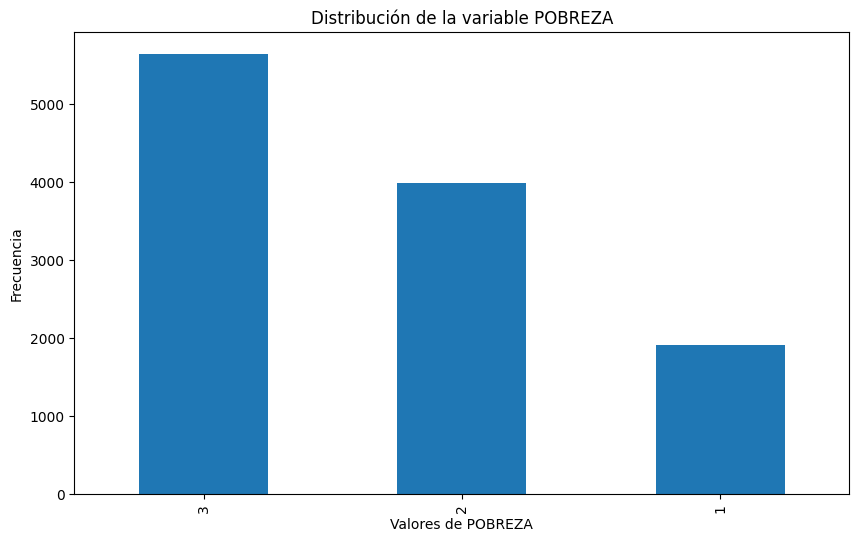

In [189]:
df_hogar['pobreza'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Distribución de la variable POBREZA')
plt.xlabel('Valores de POBREZA')
plt.ylabel('Frecuencia')
plt.show()


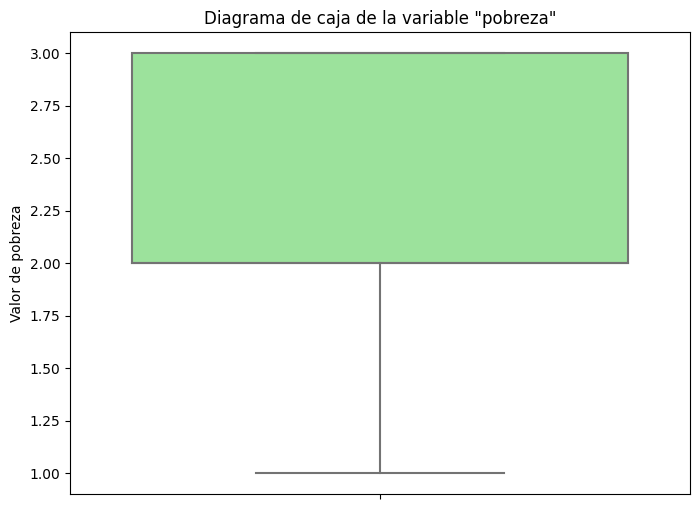

In [190]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_hogar['pobreza'], color='lightgreen')
plt.title('Diagrama de caja de la variable "pobreza"')
plt.ylabel('Valor de pobreza')
plt.show()

## Análisis Bivariable

In [191]:
correlation = df_hogar.corrwith(df_hogar['pobreza'])
correlation

C:\Users\pablo\AppData\Local\Temp\ipykernel_6656\2616200780.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df_hogar.corrwith(df_hogar['pobreza'])


region    -0.106606
depto     -0.169786
area      -0.296418
upm       -0.184365
numhog    -0.108381
             ...   
p01h15     0.005214
p01h16    -0.005252
dia_enc   -0.021131
mes_enc   -0.059017
a_enc      0.026311
Length: 154, dtype: float64

In [192]:
# Filtrar las variables con correlación mayor a 0.5 en valor absoluto
high_corr = correlation[abs(correlation) > 0.35]

# Excluir la variable "P01H16" de los resultados
high_corr = high_corr.drop('pobreza', errors='ignore')

# Mostrar las variables con correlación mayor a 0.5
print("Variables con correlación mayor a 0.35 con POBREZA:")
print(high_corr)


Variables con correlación mayor a 0.35 con POBREZA:
thogar     -0.492495
ppb04      -0.492495
ppd04a     -0.489107
p01a04     -0.468616
p01a05b    -0.366318
p01d17     -0.431967
p01d19d    -0.396659
p01d27      0.383377
p01e01_3   -0.502796
p01e01_8    0.365269
dtype: float64


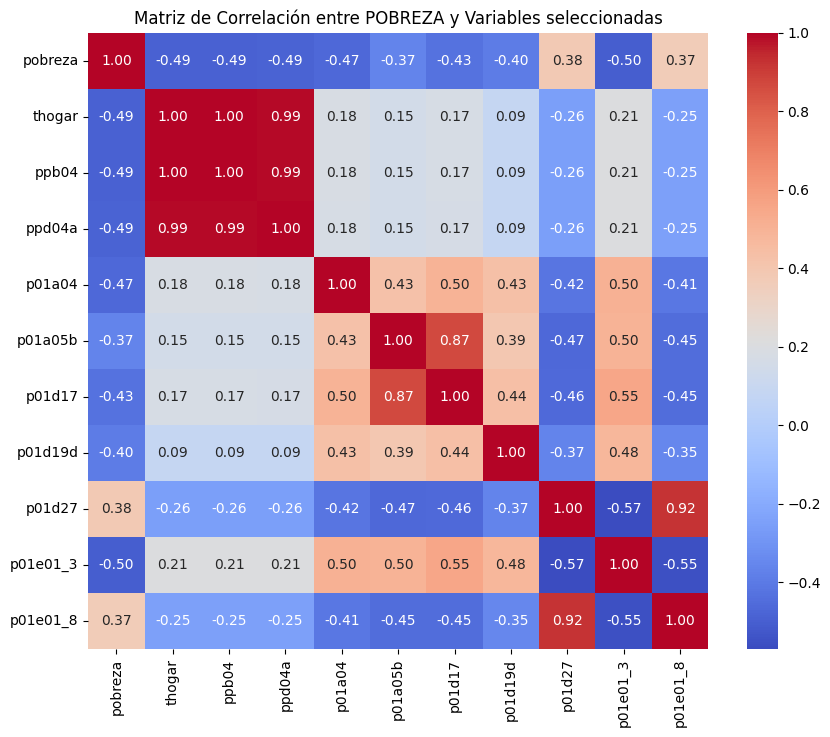

In [193]:
high_corr_vars = high_corr.index.to_list()


# Filtrar el DataFrame para incluir solo las variables de alta correlación
correlation_df = df_hogar[['pobreza'] + high_corr_vars]

# Calcular la matriz de correlación
correlation_matrix = correlation_df.corr()

# Crear un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre POBREZA y Variables seleccionadas')
plt.show()

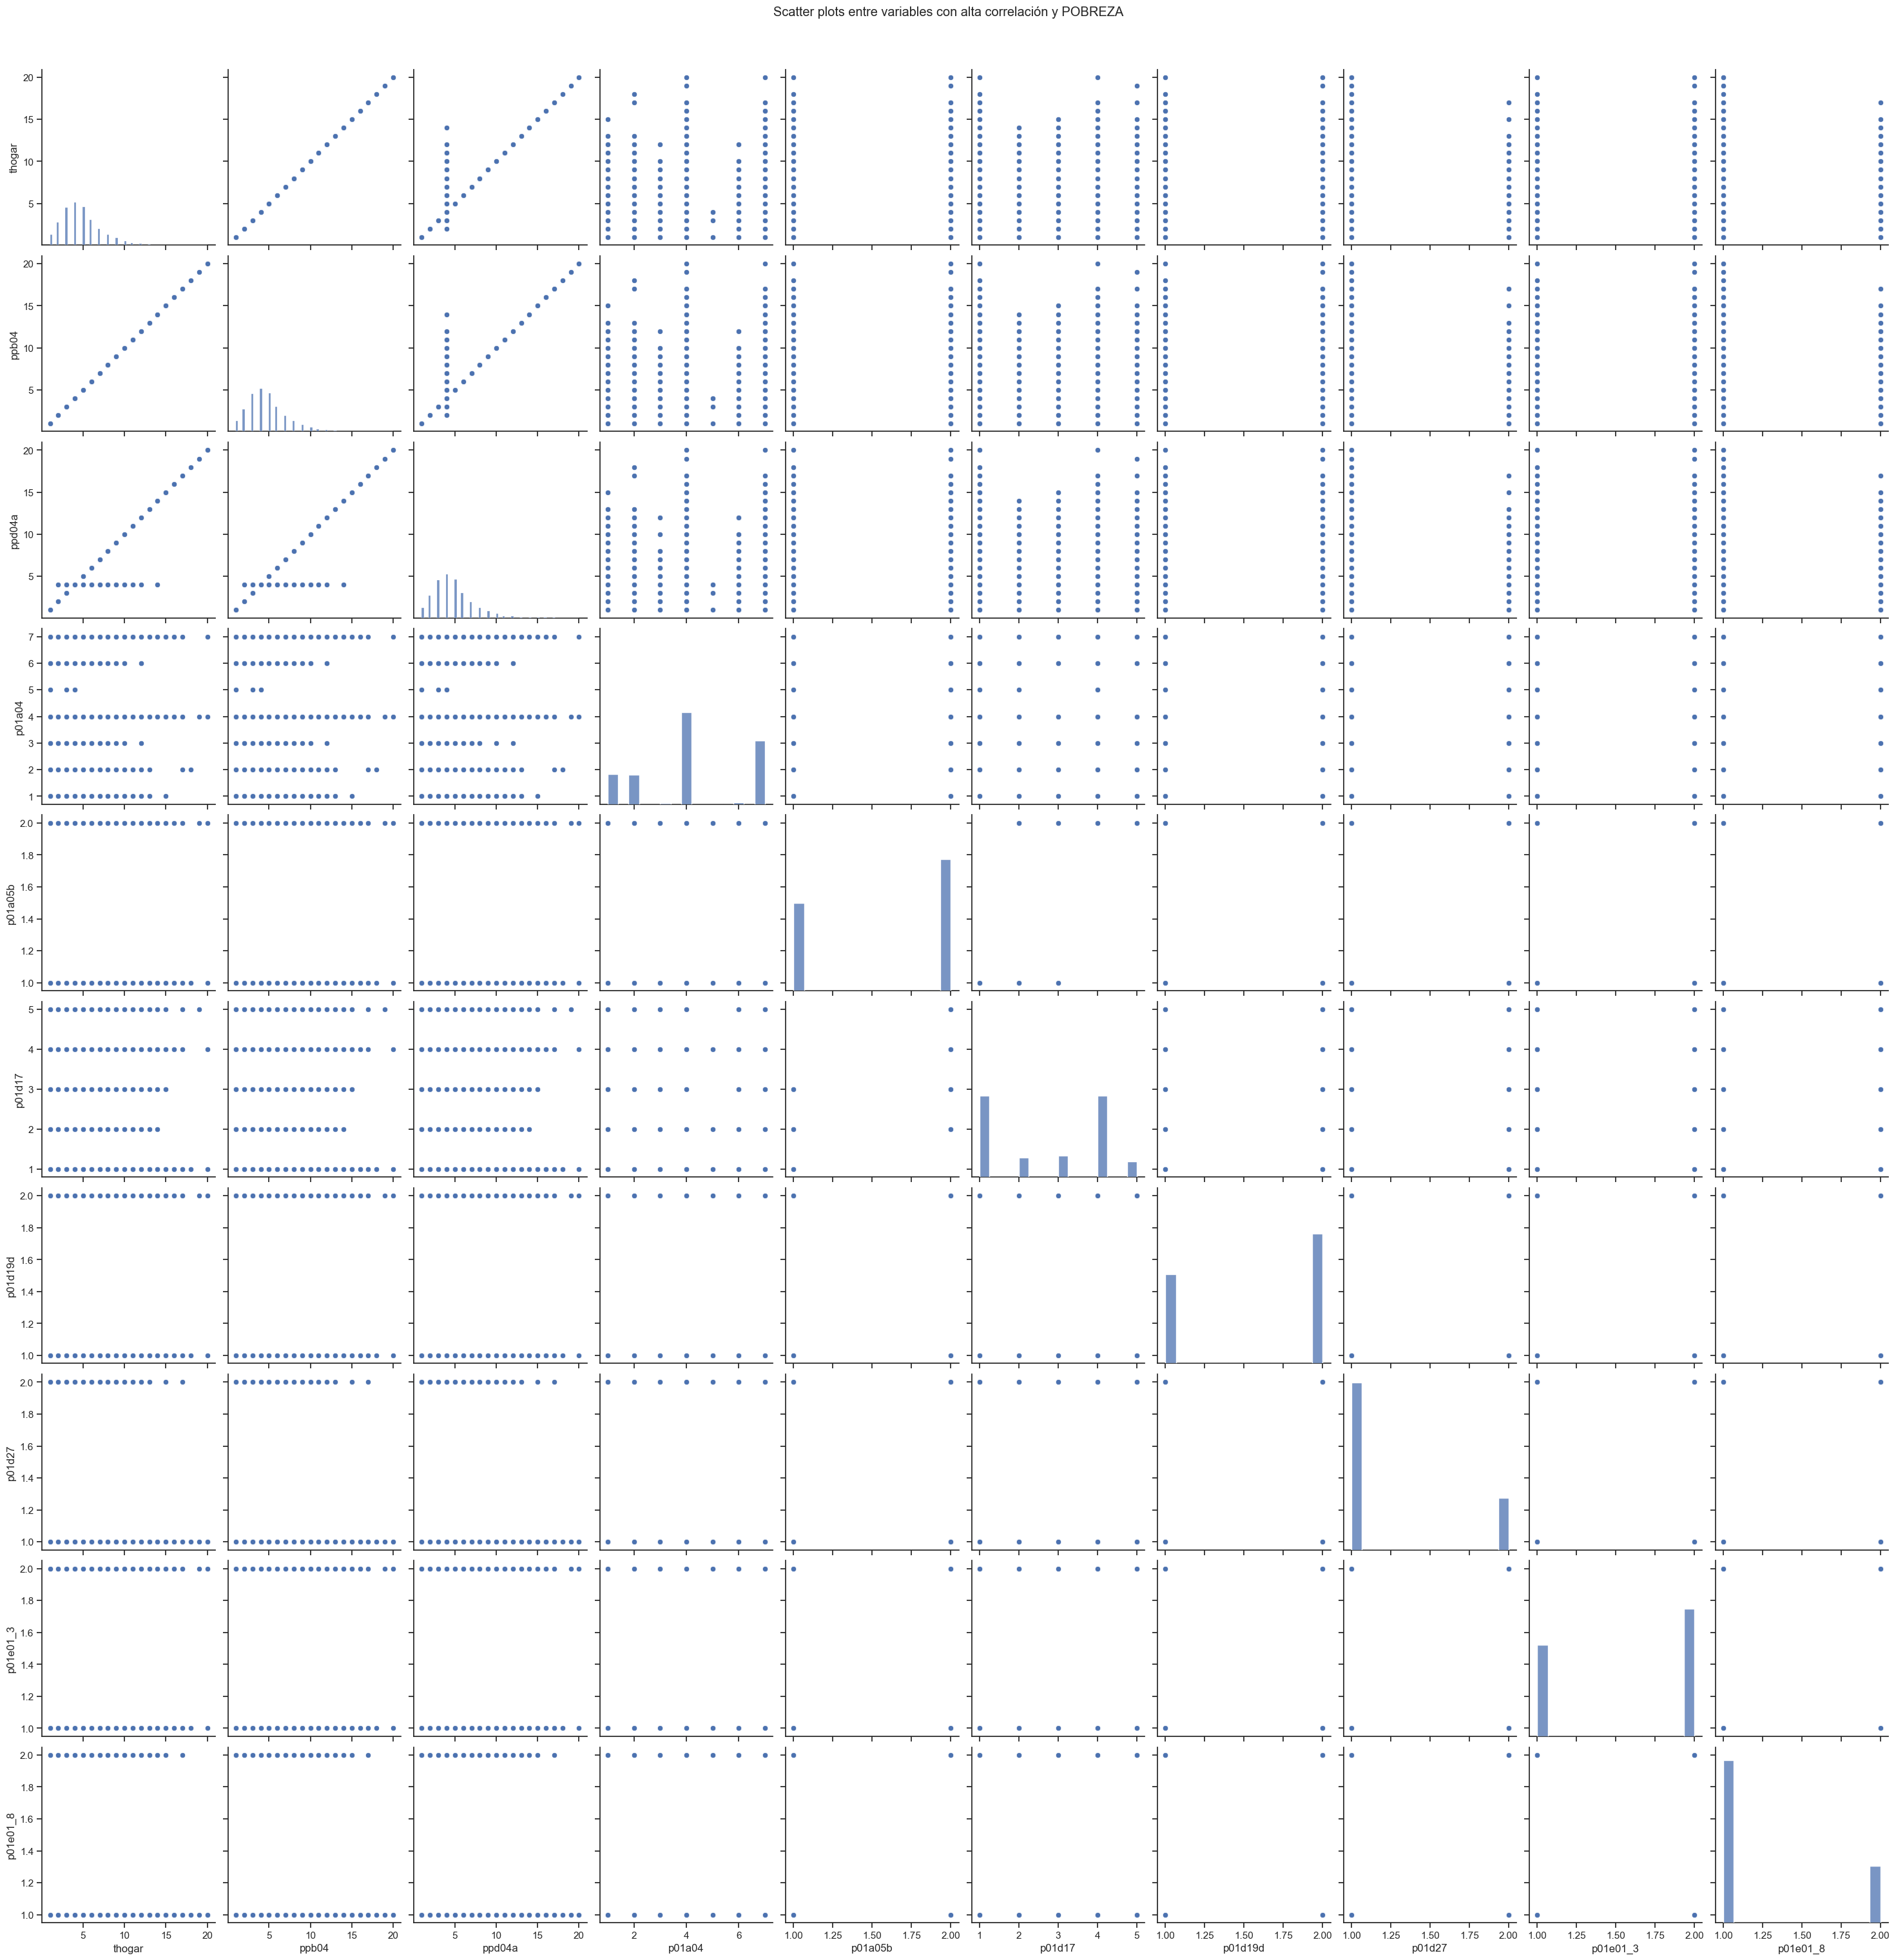

In [204]:
# Variables con alta correlación
high_corr_vars = correlation_df.columns.tolist()[1:]  # Excluye la variable 'pobreza'

# Scatter plots para relaciones entre pares de variables con tamaño más grande
sns.set(style="ticks")
sns.pairplot(correlation_df, vars=high_corr_vars, kind='scatter', height=3)  # Ajusta el valor de height
plt.suptitle('Scatter plots entre variables con alta correlación y POBREZA', y=1.02)
plt.show()

## Visualización de Datos

##### Grafica de barras para thogar

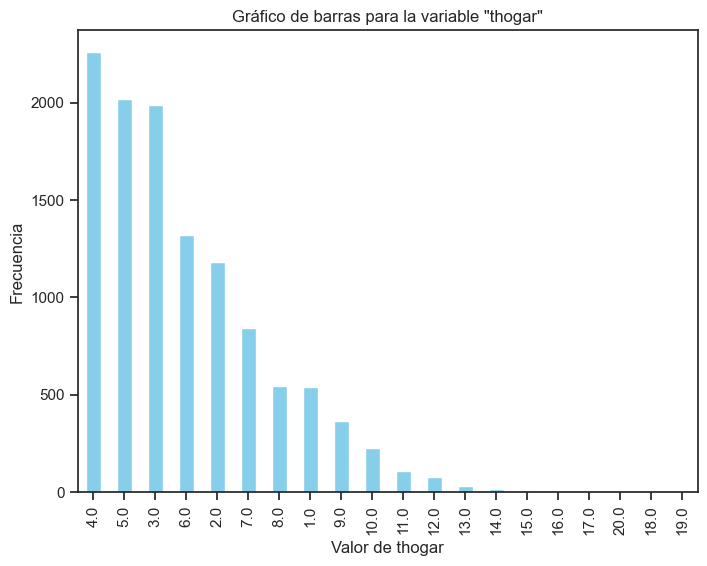

In [205]:
plt.figure(figsize=(8, 6))
df_hogar['thogar'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Gráfico de barras para la variable "thogar"')
plt.xlabel('Valor de thogar')
plt.ylabel('Frecuencia')
plt.show()

##### Grafica de barras para ppb04

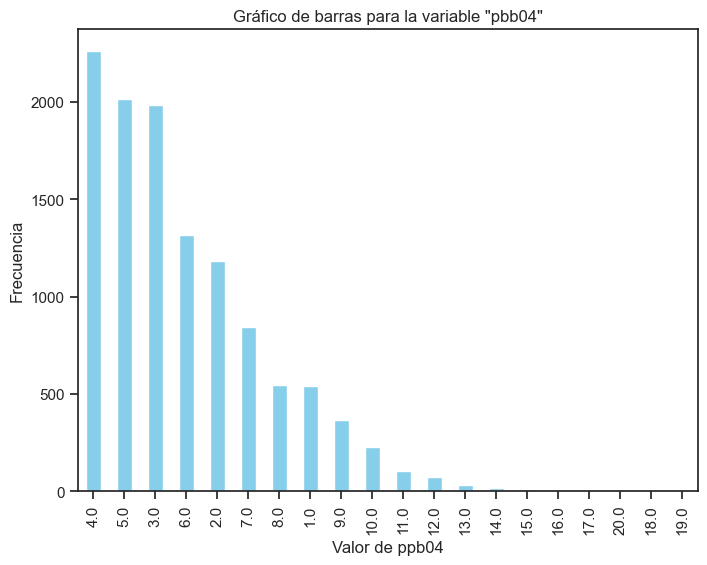

In [213]:
plt.figure(figsize=(8, 6))
df_hogar['ppb04'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Gráfico de barras para la variable "pbb04"')
plt.xlabel('Valor de ppb04')
plt.ylabel('Frecuencia')
plt.show()

##### Grafica de barras para la variable p01a04

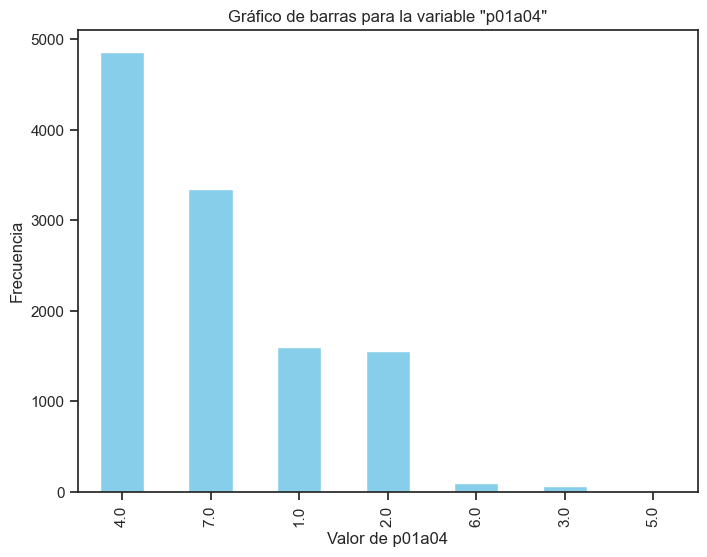

In [214]:
plt.figure(figsize=(8, 6))
df_hogar['p01a04'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Gráfico de barras para la variable "p01a04"')
plt.xlabel('Valor de p01a04')
plt.ylabel('Frecuencia')
plt.show()

##### Grafica de barras p01a05b

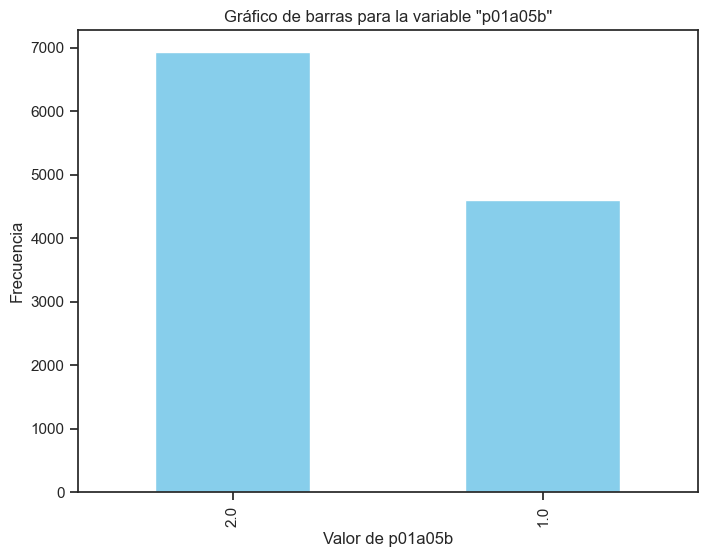

In [215]:
plt.figure(figsize=(8, 6))
df_hogar['p01a05b'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Gráfico de barras para la variable "p01a05b"')
plt.xlabel('Valor de p01a05b')
plt.ylabel('Frecuencia')
plt.show()

##### Grafica de barras p01d19d

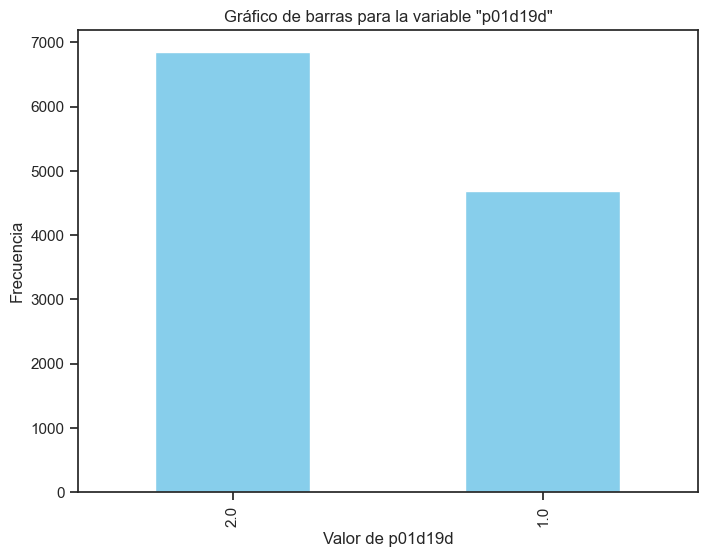

In [216]:
plt.figure(figsize=(8, 6))
df_hogar['p01d19d'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Gráfico de barras para la variable "p01d19d"')
plt.xlabel('Valor de p01d19d')
plt.ylabel('Frecuencia')
plt.show()

##### Grafica de barras p01e01_3

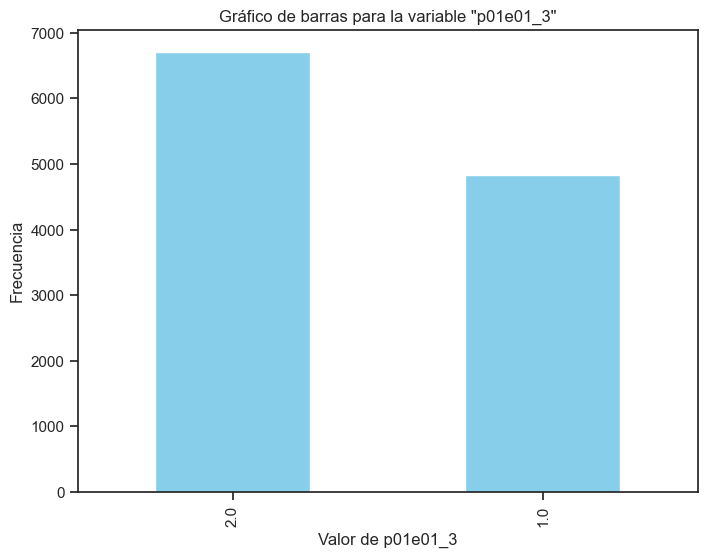

In [217]:
plt.figure(figsize=(8, 6))
df_hogar['p01e01_3'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Gráfico de barras para la variable "p01e01_3"')
plt.xlabel('Valor de p01e01_3')
plt.ylabel('Frecuencia')
plt.show()

##### Grafica de barras p01e01_8


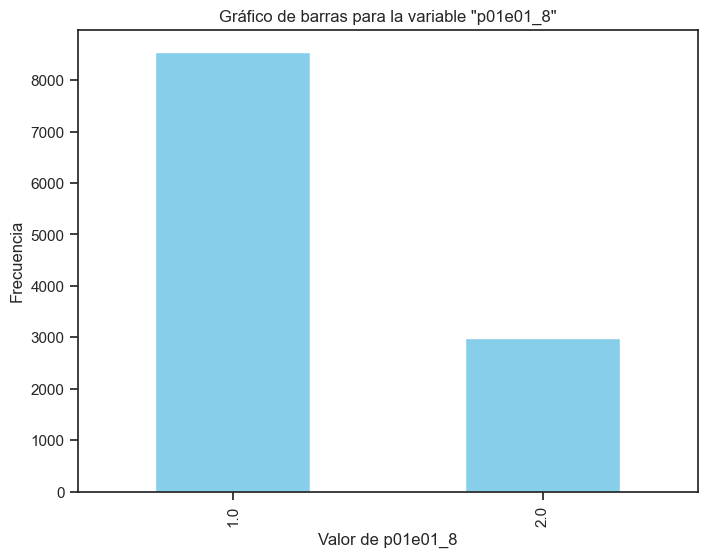

In [218]:
plt.figure(figsize=(8, 6))
df_hogar['p01e01_8'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Gráfico de barras para la variable "p01e01_8"')
plt.xlabel('Valor de p01e01_8')
plt.ylabel('Frecuencia')
plt.show()

## Modelado y Pruebas


#### Preparación de Datos

##### Modelo para predecir la variable Pobreza


In [194]:
features = df_hogar[['thogar', 'ppb04', 'p01a04', 'p01a05b', 'p01d19d', 'p01e01_3', 'p01e01_8']]
target = df_hogar['pobreza']

In [195]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [196]:
# ros = RandomOverSampler(random_state=42)
# X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [197]:
y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1

# Convertir las etiquetas ajustadas a un formato one-hot con 3 clases
y_train_encoded = to_categorical(y_train_adjusted, num_classes=3)
y_test_encoded = to_categorical(y_test_adjusted, num_classes=3)

In [198]:
# print("Antes del sobremuestreo:", X_train.shape, y_train.shape)
# print("Después del sobremuestreo:", X_train_resampled.shape, y_train_resampled.shape)

#### Construcción del Modelo 

In [199]:
model = Sequential()
model.add(Dense(128, input_dim=features.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [200]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 128)               1024      
                                                                 
 dense_67 (Dense)            (None, 64)                8256      
                                                                 
 dense_68 (Dense)            (None, 32)                2080      
                                                                 
 dense_69 (Dense)            (None, 16)                528       
                                                                 
 dense_70 (Dense)            (None, 8)                 136       
                                                                 
 dense_71 (Dense)            (None, 3)                 27        
                                                                 
Total params: 12,051
Trainable params: 12,051
Non-tra

In [201]:

model.compile(loss='BinaryCrossentropy', optimizer="adam", metrics=['accuracy'])

In [202]:
history = model.fit(X_train,y_train_encoded, epochs=15, validation_data=(X_test, y_test_encoded))

Epoch 1/15


289/289 [==============================] - 2s 2ms/step - loss: 0.5948 - accuracy: 0.5471 - val_loss: 0.5008 - val_accuracy: 0.6438
Epoch 2/15
289/289 [==============================] - 0s 2ms/step - loss: 0.4775 - accuracy: 0.6318 - val_loss: 0.4498 - val_accuracy: 0.6655
Epoch 3/15
289/289 [==============================] - 0s 2ms/step - loss: 0.4599 - accuracy: 0.6442 - val_loss: 0.4646 - val_accuracy: 0.6300
Epoch 4/15
289/289 [==============================] - 0s 2ms/step - loss: 0.4505 - accuracy: 0.6493 - val_loss: 0.4347 - val_accuracy: 0.6841
Epoch 5/15
289/289 [==============================] - 0s 2ms/step - loss: 0.4435 - accuracy: 0.6590 - val_loss: 0.4311 - val_accuracy: 0.6802
Epoch 6/15
289/289 [==============================] - 1s 2ms/step - loss: 0.4411 - accuracy: 0.6569 - val_loss: 0.4293 - val_accuracy: 0.6772
Epoch 7/15
289/289 [==============================] - 1s 2ms/step - loss: 0.4386 - accuracy: 0.6638 - val_loss: 0.4263 - val_accuracy: 0.6815
Epoch 8/15
289/28

#### Evaluación del Modelo

#### Optimización y Ajuste

#### Reflexión